In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv("../data/raw/spam_or_not_spam.csv")
print(data.head(20))

                                                email  label
0    date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...    0.0
1   martin a posted tassos papadopoulos the greek ...    0.0
2   man threatens explosion in moscow thursday aug...    0.0
3   klez the virus that won t die already the most...    0.0
4    in adding cream to spaghetti carbonara which ...    0.0
5    i just had to jump in here as carbonara is on...    0.0
6   the scotsman NUMBER august NUMBER playboy want...    0.0
7   martin adamson wrote isn t it just basically a...    0.0
8   the scotsman thu NUMBER aug NUMBER meaningful ...    0.0
9   i have been trying to research via sa mirrors ...    0.0
10  hello have you seen and discussed this article...    0.0
11  yes great minds think alike but even withput e...    0.0
12  on mon aug NUMBER NUMBER at NUMBER NUMBER NUMB...    0.0
13   from chris garrigues cwg exmh deepeddy com da...    0.0
14  spamassassin is hurting democracy owen URL int...    0.0
15  hi all apologies for

In [3]:
data.shape

(3032, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   email   3015 non-null   object 
 1   label   3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.5+ KB


In [5]:
column_descriptions = {
    'email_id': 'Unique identifier for email',
    'subject': 'Email subject line',
    'message': 'Email body content',
    'label': 'Target variable (0=ham, 1=spam)',
    'date': 'Date email was sent',
    'sender': 'Email sender address'
}

for col, desc in column_descriptions.items():
    if col in data.columns:
        print(f"{col}: {desc}")

label: Target variable (0=ham, 1=spam)


In [6]:
missing_df = pd.DataFrame({
    'column' : data.columns ,
    'missing_count' : data.isnull().sum() , 
    'missing_percentage' : (data.isnull().sum() / len(data)) *100
})
display(missing_df.sort_values('missing_percentage' , ascending= False))


,column,missing_count,missing_percentage
label,label,32,1.055409
email,email,17,0.560686


In [7]:
duplicates = data.duplicated().sum()
print(duplicates)
if duplicates > 0:
    duplicate_samples = data[data.duplicated()].head()
    display(duplicate_samples)


142


,email,label
319,i think that this and other articles confuse s...,0.0
320,i think that this and other articles confuse s...,0.0
462,i agree with rob i think if the phones and mms...,0.0
572,NaN,NaN
674,NaN,NaN


In [8]:
dtype_df = pd.DataFrame({
    'column': data.columns,
    'dtype': data.dtypes,
    'unique_values': data.nunique()
})
display(dtype_df)

,column,dtype,unique_values
email,email,object,2888
label,label,float64,2


,count,percentage
label,,
0.0,2500,83.333333
1.0,500,16.666667


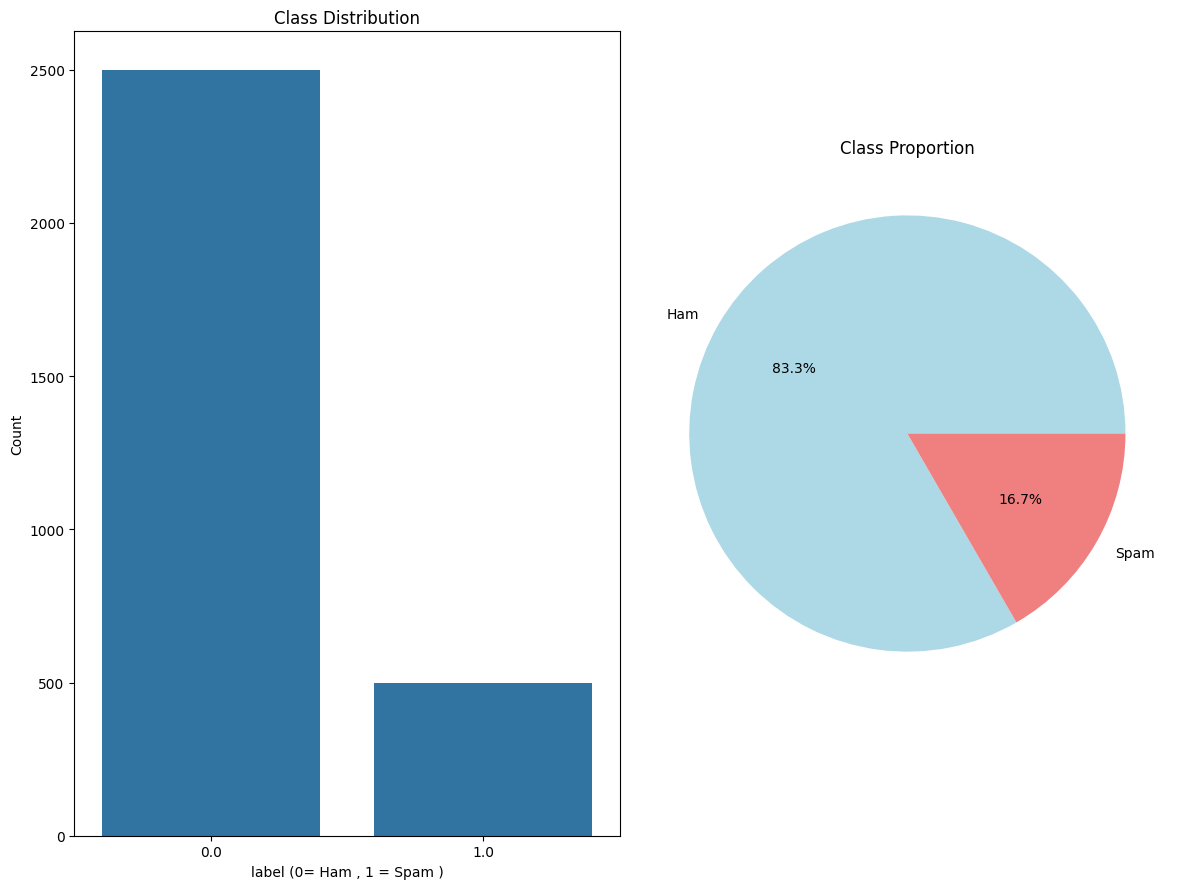

In [ ]:
target_counts = data['label'].value_counts()
target_percent = data['label'].value_counts(normalize= True) *100
target_stats = pd.DataFrame({
    'count': target_counts,
    'percentage': target_percent
})
display(target_stats)
fig , axes = plt.subplots(1 ,2 ,figsize =(12, 9))
sns.countplot(data = data , x = 'label' , ax = axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('label (0= Ham , 1 = Spam )')
axes[0].set_ylabel('Count')


axes[1].pie(target_counts ,labels =['Ham' , 'Spam'], autopct ='%1.1f%%' , colors = ['lightblue', 'lightcoral'])
axes[1].set_title('Class Proportion')
S
plt.tight_layout()
plt.show()